In [2]:
'''
First define a function to read in fasta file.
1. adding line = line.rstrip(), which will remove \n at the end of each line
2. save results as a generator object, with name (strains) and seq (genomes), easier to store and reference

'''
import pandas as pd
import numpy as np

def read_fasta(fp):
        name, seq = None, []
        for line in fp:
            line = line.rstrip()
            if line.startswith(">"):
                if name: yield (name, ''.join(seq))
                name, seq = line, []
            else:
                seq.append(line)
        if name: yield (name, ''.join(seq))

            

Extra: 
BioPython is a library designed for reading in fasta format data faster, and easier since it has methods wrapped up. Here is a tutorial if would like to explore more: https://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc11

In [3]:
#adding strain data to one array and genomic data to the other
strains = []
genomes = []

with open(r'C:/Users/srava/BedfordProjects/zika/results/aligned.fasta') as fp:
    for name, seq in read_fasta(fp):
            strains.append(name)
            genomes.append(seq)

In [4]:
#getting rid of the > in front of the strains in order to merge the aligned.fasta into the metadata.fasta
for i in range(0, len(strains)):
    strains[i] = strains[i].replace('>','')

User manual on MCA: https://github.com/esafak/mca/blob/master/docs/usage.rst

# The matrix below, when constructed as a heat map, should look similar to this: 
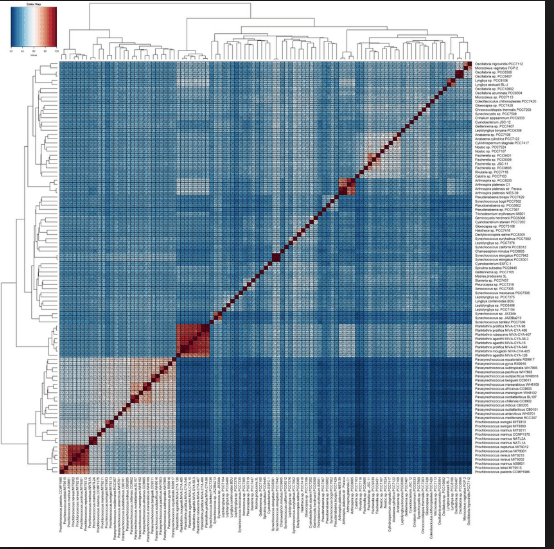

# Similarity Matrix (Where "|" is "Compared To")
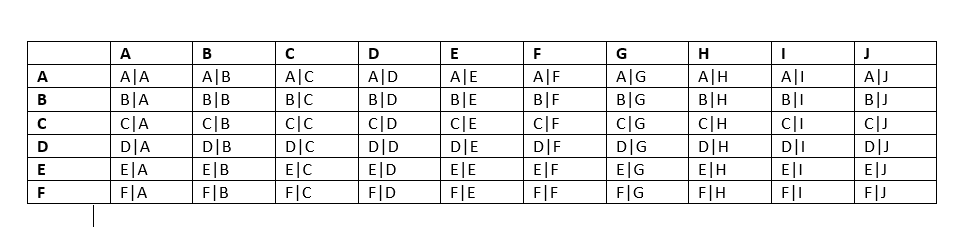

In [5]:
#using distance to calculate PCA (pairwise scores)
#compare substrings
#TFIDF(package)
#string distance (pick multiple and vectorize them)
#pairwise aligner (the average of each strain when compared with multiple other strain)
#creating a similarity matrix

In [6]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(array1, array2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(array1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if array1[i] != array2[i] and array1[i] != 'N' and array2[i] != 'N':
            distance += 1
    # Return the final count of differences
    return distance

In [7]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        numbers.append(num)
    matrixOfNum.append(numbers)
    numbers = []
dataa = pd.DataFrame(matrixOfNum, columns = ["strain " + str(i) for i in range(1,len(matrixOfNum) + 1)], dtype="float")
print(dataa)

     strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0         0.0      12.0      15.0      14.0      19.0      13.0      12.0   
1        12.0       0.0      15.0      14.0      18.0      13.0      11.0   
2        15.0      15.0       0.0      17.0      21.0      16.0      14.0   
3        14.0      14.0      17.0       0.0       8.0      15.0      13.0   
4        19.0      18.0      21.0       8.0       0.0      20.0      19.0   
5        13.0      13.0      16.0      15.0      20.0       0.0      13.0   
6        12.0      11.0      14.0      13.0      19.0      13.0       0.0   
7        13.0      12.0      15.0      12.0      18.0      14.0      13.0   
8        13.0      12.0      15.0      14.0      20.0      14.0      13.0   
9        18.0      19.0      22.0      21.0      27.0      21.0      19.0   
10       18.0      19.0      22.0      21.0      27.0      21.0      19.0   
11       15.0      15.0      16.0      16.0      20.0      16.0      14.0   

In [8]:
dataa.to_csv("DistanceMatrix",sep = ',')

In [9]:
import seaborn as sns
sns.heatmap(dataa)

#This is the heat map I was talking about before

In [10]:
from sklearn.decomposition import PCA


#performing PCA on my pandas dataframe 
pca = PCA(n_components=10,svd_solver='full') #can specify n, since with no prior knowledge, I use None
principalComponents = pca.fit_transform(dataa)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component " + str(i) for i in range(1,11)])

In [11]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-149.422029,142.729551,231.600978,-56.167752,-29.934692,8.860758,6.968664,5.267695,-15.347036,-4.367828
1,-181.707429,125.323051,223.006285,-49.662056,-28.442482,6.410040,7.665989,4.261124,-14.640766,-5.035227
2,-91.393783,156.019634,231.105498,-56.454288,-34.427220,5.000896,9.653547,4.396450,-15.323866,2.725954
3,-113.046100,161.837475,238.659224,-59.295516,-30.938435,6.113677,10.712337,9.178146,-13.688195,-5.529627
4,-28.631385,183.928916,235.536151,-48.806171,-21.639508,-1.721045,9.632190,20.741460,15.419871,10.611256
5,-124.067777,152.987081,228.575758,-58.056662,-30.840781,7.109049,9.175943,5.330727,-16.684317,-5.122754
6,-183.032972,88.169882,233.529658,-46.153609,-12.860419,-3.100186,-0.098809,22.043370,14.540869,12.538670
7,-167.367148,109.647928,243.664704,-49.951886,-7.420980,-3.136077,0.024285,23.326614,12.207245,10.478843
8,-137.739813,133.915798,233.093915,-45.411437,-18.479821,-0.032874,4.277641,19.624071,17.150951,10.947477
9,-1.696951,179.856573,231.997776,-50.853540,-28.358801,-0.712571,4.855566,24.222713,21.823243,11.445345


In [12]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t',encoding='utf-8')
country_df = metadata_df[['country','strain']]
 
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']


colors_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\config\colors.tsv', delimiter='\t',encoding='utf-8')
colors_df.columns = ['y','country', 'color']
colors_df1 = colors_df[['country','color']]

result = pd.merge(metadata_df,
                 colors_df1[['country', 'color']],
                 on='country')
result_df_region = result[['strain','region']]
result_df = result[['strain','country','color']]
#now have to make a 519 genome with the country for each strain correct, make it into a dataframe, and concat it to finalDb 


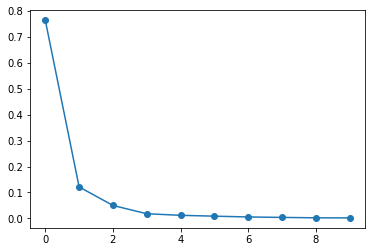

In [13]:
#explained variance for PCA plot below
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_, marker="o")

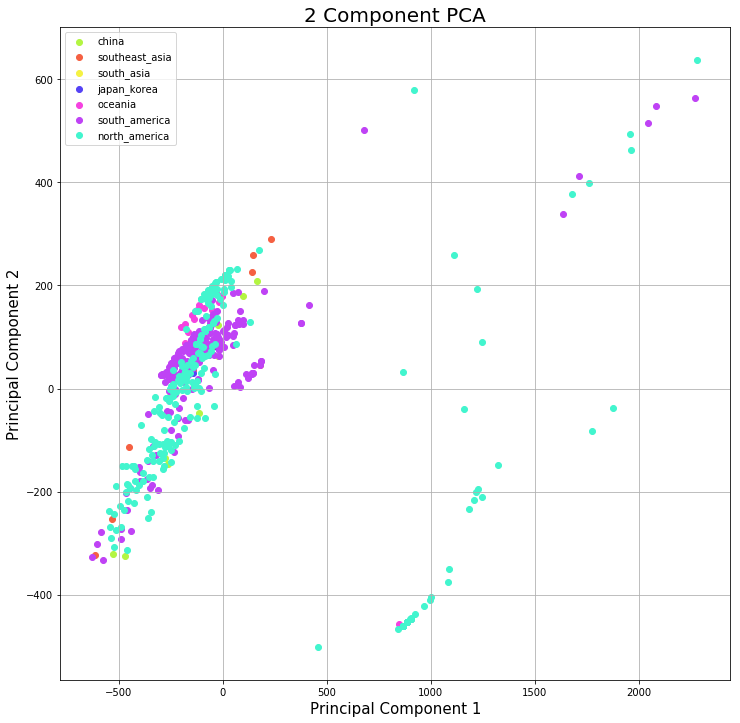

In [14]:
#plotting principal component 1 and 2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

df = pd.DataFrame(strains) 
cols = ['target']
df.columns = cols

#Do a merge instead at some point (concat just sticks them together, could eventually be a problem)
finalDf = pd.concat([principalDf, result_df_region[['region','strain']]], axis = 1)

'''
targets = ['india', 'thailand', 'vietnam', 'singapore', 'french_polynesia',
           'american_samoa', 'fiji', 'tonga', 'china', 'taiwan', 'japan', 'italy',
           'brazil', 'peru', 'ecuador', 'colombia', 'french_guiana', 'suriname',
           'venezuela', 'panama', 'nicaragua', 'honduras', 'el_salvador',
           'guatemala', 'mexico', 'martinique', 'guadeloupe', 
           'saint_barthelemy', 'usvi', 'puerto_rico', 'jamaica',
           'dominican_republic', 'haiti', 'cuba', 'usa']
'''
targets=['china', 'southeast_asia', 'south_asia', 'japan_korea', 'oceania', 'south_america', 'north_america']
colors = ['#b3f542','#f56042','#f5f242', '#5442f5', '#f542e0', '#bf42f5', '#42f5ce']
from random import randint

for target,color in zip(targets,colors):
    indicesToKeep = finalDf['region'] == target
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

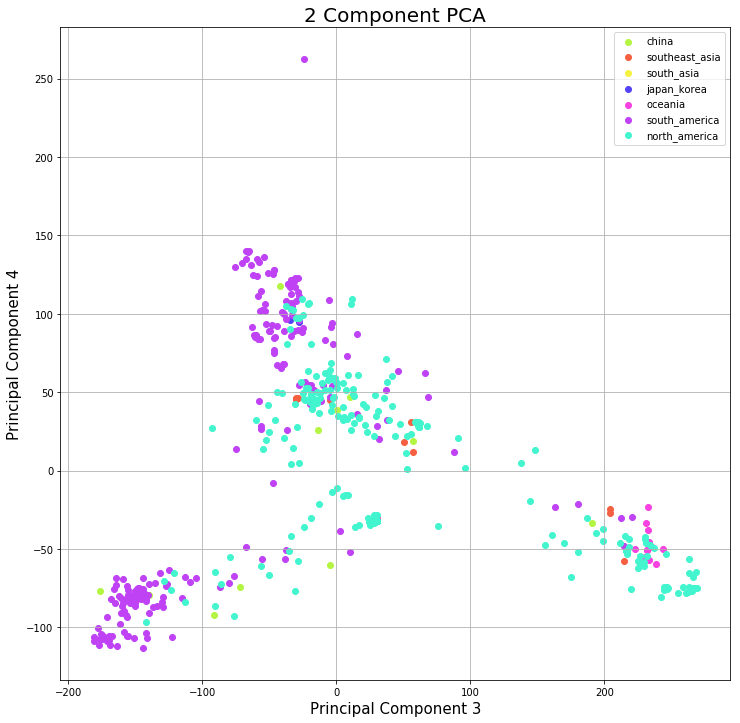

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

df = pd.DataFrame(strains) 
cols = ['target']
df.columns = cols

#Do a merge
finalDf = pd.concat([principalDf, result_df_region[['region','strain']]], axis = 1)
#finalDf = pd.merge(principalDf, result_df[['country', 'color']],on='country')

targets=['china', 'southeast_asia', 'south_asia', 'japan_korea', 'oceania', 'south_america', 'north_america']
colors = ['#b3f542','#f56042','#f5f242', '#5442f5', '#f542e0', '#bf42f5', '#42f5ce']
from random import randint
"""
colors = [] 
for i in range(0,len(targets)):
    colors.append('#' + '%06X' % randint(0, 0xFFFFFF))
"""
for target,color in zip(targets,colors):
    indicesToKeep = finalDf['region'] == target
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color)
ax.legend(targets)
ax.grid()

In [16]:
#look into outliers on the PCA plot and on the heat map (the strain names, the seuqences, and where are they in the phylogeny on nextstrain)

In [17]:
#plot PC2 on a number line (look into using altair)
#maybe try taking the averages of all the distances (like divide by the number of sites) or maybe disregard gaps (like don't take N)

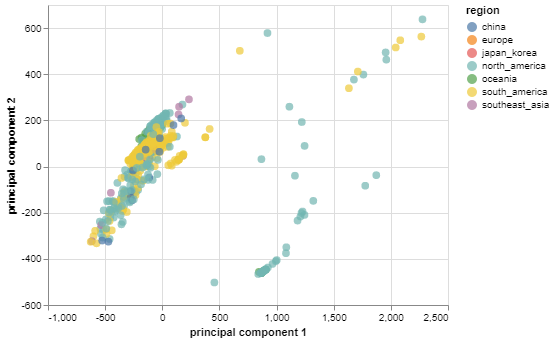

In [18]:
import altair as alt
brush = alt.selection(type='interval', resolve='global')
#link the charts
alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 1',
    y='principal component 2',
    color='region',
    tooltip=['strain', 'region']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

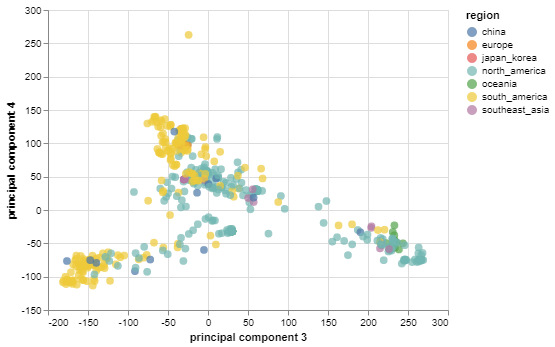

In [19]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 3',
    y='principal component 4',
    color='region',
    tooltip=['strain', 'region']
).interactive()

# Creating the Tree in Altair

In [26]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [27]:
# Import modules
import gzip
import json
import urllib3
import requests
import json
json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [28]:
tree = json_to_tree(json_tree_handle)

In [29]:
tree

Clade(branch_length=0, clade=939, name='NODE_0000520', numdate=2007.1351029672512, strain='NODE_0000520', yvalue=511.9124154362944)

In [30]:
node_data = [
    {
        "name": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades()
]

In [31]:
node_data[10]

{'name': 'NODE_0000345',
 'date': 2008.612122972273,
 'y': 507.4498308725888,
 'region': 'southeast_asia',
 'country': 'thailand',
 'parent_date': 2007.1351029672512,
 'parent_y': 511.9124154362944}

In [32]:
node_df = pd.DataFrame(node_data)

In [33]:
node_df.head()

,country,date,name,parent_date,parent_y,region,y
0,thailand,2007.135103,NODE_0000520,2007.135103,511.912415,southeast_asia,511.912415
1,thailand,2008.570845,NODE_0000346,2007.135103,511.912415,southeast_asia,516.375000
2,thailand,2010.979423,NODE_0000347,2008.570845,516.375000,southeast_asia,517.500000
3,thailand,2013.136893,THA/PLCal_ZV/2013,2010.979423,517.500000,southeast_asia,518.000000
4,thailand,2016.665298,SI_BKK01,2010.979423,517.500000,southeast_asia,517.000000


In [34]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [35]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [36]:
node_df.shape

(940, 7)

In [37]:
node_df.head()

,country,date,name,parent_date,parent_y,region,y
0,thailand,2007.135103,NODE_0000520,2007.135103,5.587585,southeast_asia,6.087585
1,thailand,2008.570845,NODE_0000346,2007.135103,5.587585,southeast_asia,1.625000
2,thailand,2010.979423,NODE_0000347,2008.570845,1.125000,southeast_asia,0.500000
3,thailand,2013.136893,THA/PLCal_ZV/2013,2010.979423,0.000000,southeast_asia,0.000000
4,thailand,2016.665298,SI_BKK01,2010.979423,0.000000,southeast_asia,1.000000


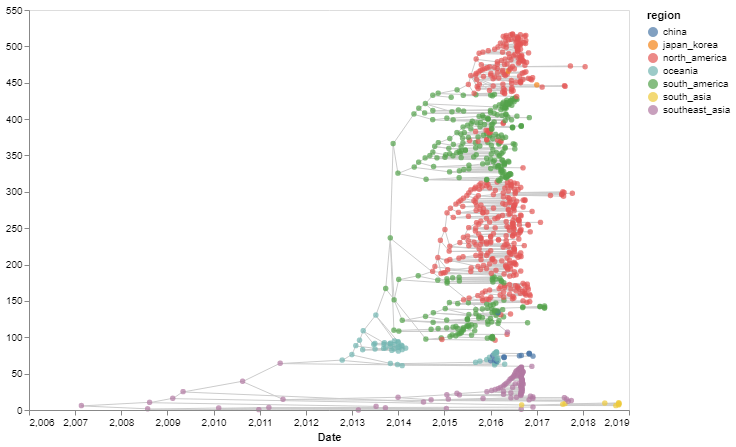

In [38]:
base = alt.Chart(node_df)

tips = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        axis=alt.Axis(grid=False),
        title="Date",
    ),
    y=alt.Y(
        "y:Q",
        title="",
        axis=alt.Axis(grid=False),
    ),
    color="region:N",
    tooltip=["name:N", "region:N", "date:Q"]
)
lines = base.mark_line().encode(
    x=alt.X("parent_date:Q", scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2))),
    x2="date:Q",
    y="parent_y:Q",
    y2="y:Q",
    color=alt.ColorValue("#cccccc")
)
tree = (lines + tips).properties(
    width=600,
    height=400
)

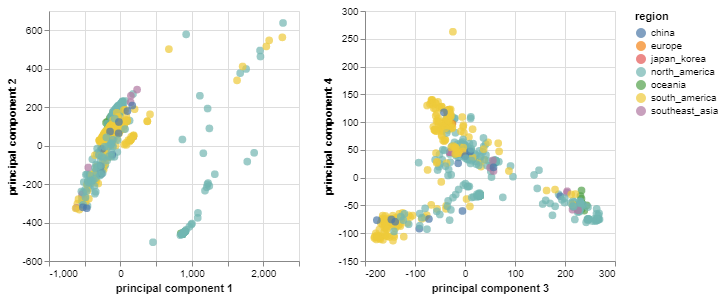

In [40]:
import altair as alt


brush = alt.selection(type='interval', resolve='global')
#link the charts
pc1 = alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 1',
    y='principal component 2',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

pc34 = alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 3',
    y='principal component 4',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

   
pc1.encode(x='principal component 1') | pc34.encode(x='principal component 3') #link the tree to this one as well

## The below code is for the heat map -- it takes a long time to run and should only be used for debugging 

In [20]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        if(len(numbers) < 3):
            numbers.append(strains[i])
            numbers.append(strains[j])
            numbers.append(num)
            matrixOfNum.append(numbers)
            numbers = []
new_data = pd.DataFrame(matrixOfNum, columns = ["Strain A", "Strain B", "distance"], dtype="float")
print(new_data)

KeyboardInterrupt: 

In [ ]:
#to to_csv on the distance dataframe and save it somewhere
#This is the heat map -- dont DONT run this cell unless you need one
alt.data_transformers.disable_max_rows()
alt.Chart(new_data).mark_rect().encode(
    x='Strain A:N',
    y='Strain B:N',
    color='distance:Q',
    tooltip = ['Strain A', "Strain B","distance"]
).interactive()
